# **Neural Network with Keras**

In [ ]:
%matplotlib inline

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/mnist.png?raw=1" >

### **1. Prerequisite Python Modules**
First, some software needs to be loaded into the Python environment.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random # For generating random numbers

from keras.datasets import mnist # MNIST dataset is included in Keras
from keras.models import Sequential # Model type to be used

from tensorflow import keras
from keras.layers import Dense, Dropout, Activation # Types of layers tobe used in our model
from tensorflow.python.keras.utils import np_utils # NumPy related tools

### **2. Loading Training Data**
The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel test images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shpae', X_test.shape)
print('y_test shape', y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shpae (10000, 28, 28)
y_test shape (10000,)


Using matplotlib, we can plot some sample images from the training set.

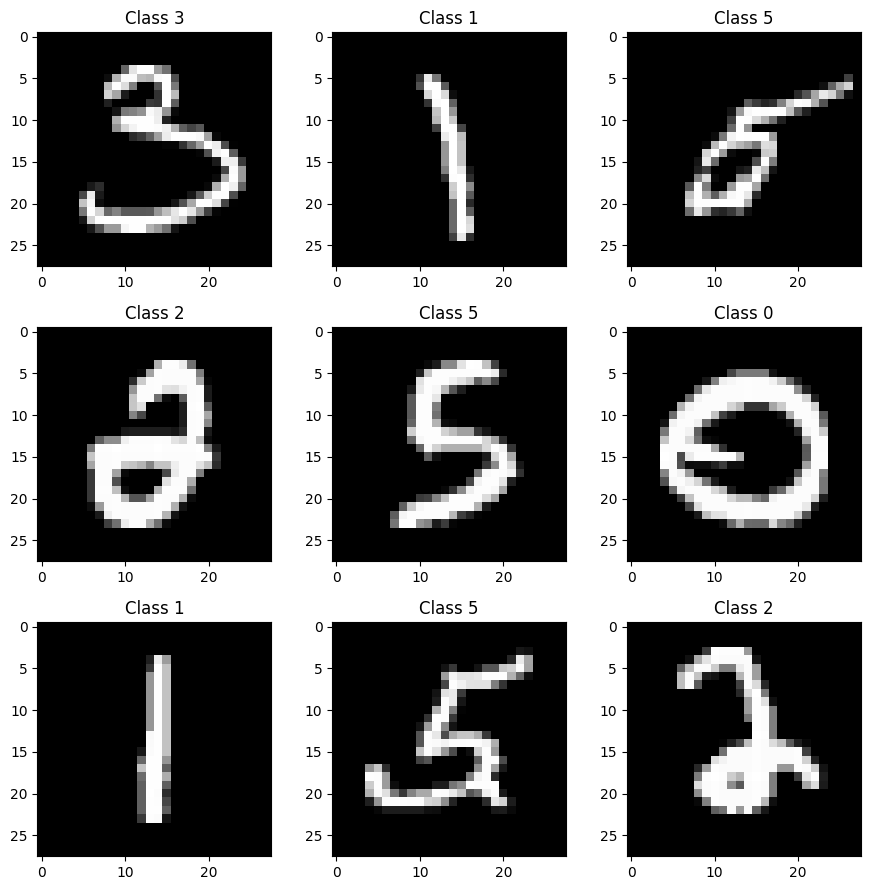

In [ ]:
plt.rcParams['figure.figsize']=(9, 9)

for i in range(9):
  plt.subplot(3, 3, i+1)
  num = random.randint(0, len(X_train))
  plt.imshow(X_train[num], cmap='gray', interpolation='none')
  plt.title('Class {}'.format(y_train[num]))

plt.tight_layout()

Examine a single digit a little closer, and print out the array representing the last digit.

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt='g'):
  col_maxes = [max([len(('{:'+fmt+'}').format(x)) for x in col]) for col in mat.T]
  for x in mat:
    for i, y in enumerate(x):
      print(('{:'+str(col_maxes[i])+fmt+'}').format(y), end=' ')
    print('')

# Print
matprint(X_train[num])

0 0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 
0 0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 
0 0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 
0 0 0 0 0 0   0   0   0  60 255 253 253 253 153   0   0   0   0   0   0   0   0  0 0 0 0 0 
0 0 0 0 0 0   0  16 171 228 253 251 251 251 251  20   0   0   0   0   0   0   0  0 0 0 0 0 
0 0 0 0 0 0  96 189 251 251 205 126 126 236 251 158   0   0   0   0   0   0   0  0 0 0 0 0 
0 0 0 0 0 0 190 251 196  31  19   0   0 181 251 158   0   0   0   0   0   0   0  0 0 0 0 0 
0 0 0 0 0 0 190 251  89   0   0   0   0  64 251 218  39   0   0   0   0   0   0  0 0 0 0 0 
0 0 0 0 0 0   0   0   0   0   0   0   0  40 218 255 122   0   0   0   0   0   0  0 0 0 0 0 
0 0 0 0 0 0   0   0   0   0   0   0   0   0 158 253 224  16   0   0   0   0   0  0 0 0 0 0 
0 0 0 0 0 0   0   0   0   0   0   0   0   0 158 253 251 126   0   0   0   0   0 

Each pixel is an 8-bit integer from 0-255. 0 is full black, while 255 is full white. This what we call a single-channel pixel. It's called monochrome.

##### **2.1 Formatting the input data layer**
* Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector.
* Each image needs to be then reshaped (or `flattened`) into a vector. We'll also normalize the inputs to be in the range [0-1] rather than [0-255].
* Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale.
<img src='https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/flatten.png?raw=1' >

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32') # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255 # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print('Training matrix shape', X_train.shape)
print('Testing matrix shape', X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Modify our classes (unique digits) to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

If the final output of our network is very close to one of these classes, then it is most likely that class. For example, if the final output is:

```
[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0]
```
then it is most probable that the image is that of the digit `1`.

In [ ]:
nb_classes = 10
print(y_train[:10])

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print(Y_train[:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### **3. Building a 3-layer fully connected network (FCN)**

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/figure.png?raw=1" />

In [ ]:
# The Sequential model is a linear stack of layers and is very common.
model = Sequential()

##### **3.1 The first hidden layer**

In [ ]:
# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bias to it.
model.add(Dense(512, input_shape=(784,))) # (784,) is not a typo -- that represents a 784 length vector!

In [ ]:
# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.
model.add(Activation('relu'))

$$f(x) = max (0,x)$$
<img src = 'relu.jpg' >

In [ ]:
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "overfitting" the training data.
model.add(Dropout(0.2))

##### **3.2 Adding the second hidden layer**

In [ ]:
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.
model.add(Dense(512)) # Layer thứ 2 khi khai báo sẽ không cần cung cấp input shape
model.add(Activation('relu'))
model.add(Dropout(0.2))

##### **3.3 The final output layer**

In [ ]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case).
model.add(Dense(10))

In [ ]:
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

In [ ]:
# Summarize the built model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

##### **3.4 Tính toán số lượng parameter của model**
* FCN(fully connected network) đầu tiên, có input là vector 784 chiều và có 512 node ==> Param# = 784*512+512 = 401920 (mỗi node có thêm 1 bias)
* Activation và Dropout không có parameter
* FCN tiếp theo (Hidden layer) có 512 node và input từ 512 node ở layer trước ==> Param# = 512*512+512 = 262656
* Activation và Dropout tiếp theo không có parameter.
* FCN cuối cùng(Output layer) có 10 node và input từ 512 node ở hidden layer ==> Param# = 512*10+10 = 5130
* ==> Total Param# = 401920+262656+5130 = 669706

### **4. Compiling the model**
* Keras is built on top of Theano and TensorFlow. Both packages allow you to define a *computation graph* in Python, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.
* When compiing a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical cross-entropy*, and is a loss function well-suited to comparing two probability distributions.
* Our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. [More detail at Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)
* The optimizer helps determine how quickly the model learns through **gradient descent**. The rate at which descends a gradient is called the **learning rate**.
* So are smaller learning rates better? Not quite! It's important for an optimizer not to get stuck in `local minima` while neglecting the `global minimum` of the loss function. Sometimes that means trying a larger learning rate to jump out of a local minimum.

In [ ]:
# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

### **5. Train the model**
* The `batch size` determines over `how much data per step is used to compute the loss function, gradients, and back propagation`.
* Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.
* Too large of a batch size smoothes the `local minima` of the loss function, `causing the optimizer to settle in one because it thinks it found the global minimum`.
* Too small of a batch size `creates a very noisy loss function`, and `the optimizer may never find the global minimum`.
* So a good batch size may take some trial and error to find!

In [ ]:
# Với batch_size=128(trong 1 lần dùng 128 samples để tính loss, cập nhật weights): tức là nhân matrix (128,784) với ma trận trọng số.
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1) # Để hiển thị kết quả từng epoch.

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2531 - accuracy: 0.9236
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1013 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0729 - accuracy: 0.9777
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0570 - accuracy: 0.9816
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0454 - accuracy: 0.9849


The two numbers, in order, represent the value of the loss function of the network on the training set, and the overall accuracy of the network on the training data. But how does it do on data it did not train on?

### **6. Evaluate Model's Accuracy on Test Data**

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0619 - accuracy: 0.9809
Test score: 0.06186633184552193
Test accuracy 0.98089998960495


##### **6.1 Inspecting the output**
* It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [ ]:
# The predict_classes function outputs: the highest probability class
# according to the trained classifier for each input example.
# predicted_classes = model.predict_classes(X_test)
predict_x = model.predict(X_test)
print(predict_x)
predicted_classes = np.argmax(predict_x, axis=1) # trả về vị trí giá trị max của predict_x theo hàng
print(predicted_classes)

# Check which items got right/wrong
# numpy.nonzero(a): Return the indices of the elements that are non-zero
correct_indices = np.nonzero(predicted_classes==y_test)[0]
incorrect_indices = np.nonzero(predicted_classes!=y_test)[0]

313/313 [==============================] - 0s 2ms/step
[[1.06634594e-08 1.84485344e-07 6.58876047e-07 ... 9.99990880e-01
  8.68146000e-09 6.35917468e-06]
 [2.83321189e-09 3.43118991e-05 9.99965131e-01 ... 4.84744511e-09
  6.21175715e-08 7.08604703e-11]
 [2.20412755e-08 9.99983966e-01 4.30632696e-07 ... 1.25463703e-05
  1.72966764e-07 1.44936161e-08]
 ...
 [8.75133906e-12 1.02140341e-08 4.04821489e-11 ... 8.22928541e-07
  3.10268931e-08 4.28667954e-06]
 [2.08149475e-09 8.27340557e-11 6.20280606e-12 ... 1.11421183e-09
  3.96192581e-06 3.53686871e-12]
 [1.93375671e-09 1.33522901e-10 3.82276344e-09 ... 2.36601835e-13
  4.18391144e-09 9.14456566e-10]]
[7 2 1 ... 4 5 6]


np.nonzero()

In [ ]:
# EX: np.nonzero()
# Kết quả trả về 1 tuple các array
# Cặp giá trị ở vị trí tương ứng trong mỗi array chính là tọa độ của từng giá trị khác 0
# array x có giá trị khác 0 tại các tọa độ:(0,0), (0,1), ... ,(2, 1)
# ==> kết quả trả về tuple chứa 2 array:[0, 0, ...,2] và [0, 1, ...,1]
import numpy as np
x = np.array([[3, 5, 0], [0, 4, 0],[5, 6, 0]])
print(x)
np.nonzero(x)

[[3 5 0]
 [0 4 0]
 [5 6 0]]


(array([0, 0, 1, 2, 2]), array([0, 1, 1, 0, 1]))

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a > 3

array([[False, False, False],
       [ True,  True,  True],
       [ True,  True,  True]])

In [ ]:
# Kêt quả trả về là tuple có 2 array
# Cặp giá trị ở vị trí tương ứng của 2 array cũng là tọa độ các giá trị >3.
np.nonzero(a > 3)

(array([1, 1, 1, 2, 2, 2]), array([0, 1, 2, 0, 1, 2]))

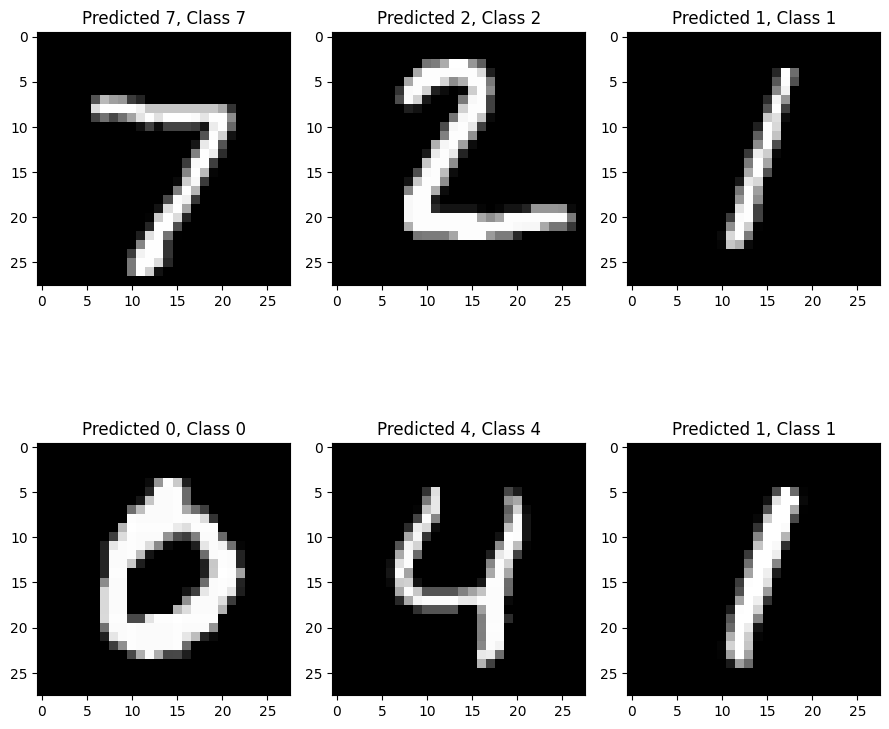

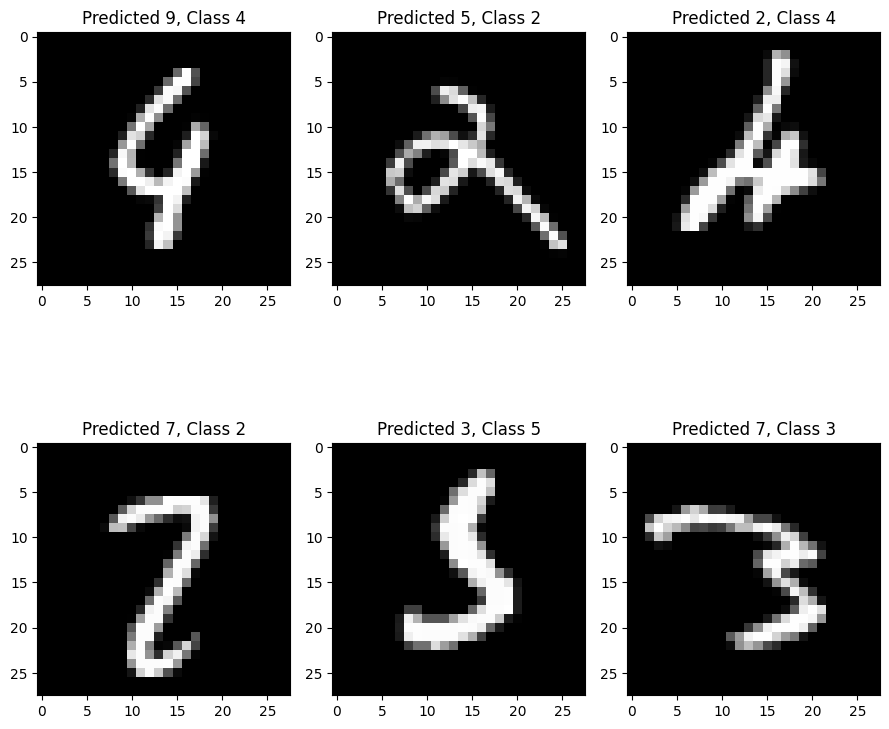

In [ ]:
# Show 1 vài sample phân loại đúng
plt.figure()
for i, correct in enumerate(correct_indices[:6]):
  plt.subplot(2, 3, i+1)
  plt.imshow(X_test[correct].reshape(28, 28), cmap='gray', interpolation='none')
  plt.title('Predicted {}, Class {}'.format(predicted_classes[correct], y_test[correct]))
plt.tight_layout()

# Show 1 vài sample phân loại sai
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:6]):
    plt.subplot(2,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()

### **7. Trying experimenting with the batch size!**
* How does increasing the batch size to 10,000 affect the training time and test accuracy?
* How about a batch size of 32?

##### **7.1 Batch_size=10.000**

In [ ]:
# Với batch_size=10000(trong 1 lần dùng 10000 samples để tính loss, cập nhật weights): tức là nhân matrix (128,784) với ma trận trọng số.
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1) # Để hiển thị kết quả từng epoch.

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0391 - accuracy: 0.9870
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0361 - accuracy: 0.9877
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0321 - accuracy: 0.9892
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0268 - accuracy: 0.9909
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0261 - accuracy: 0.9915


In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9828
Test score: 0.0680328831076622
Test accuracy 0.9828000068664551


##### **7.2 Batch_size=32**

In [ ]:
# Với batch_size=32(trong 1 lần dùng 32 samples để tính loss, cập nhật weights): tức là nhân matrix (128,784) với ma trận trọng số.
model.fit(X_train, Y_train,
          batch_size=32, epochs=5,
          verbose=1) # Để hiển thị kết quả từng epoch.

Epoch 1/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0775 - accuracy: 0.9761
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0487 - accuracy: 0.9845
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0459 - accuracy: 0.9861
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0408 - accuracy: 0.9869
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0398 - accuracy: 0.9875


In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0747 - accuracy: 0.9826
Test score: 0.07474266737699509
Test accuracy 0.9825999736785889


>**Note:** Trong bài này
* Với Batch_size=10.000 thời gian traning của model không thay đổi nhiều, và đạt accuracy cao hơn Batch_size=128.
* Với Batch_size=32 model tốn nhiều thời gian hơn để training, accuracy tương đương với Batch_size=128.

### **8. Introducing Convolution! What is it?**
Before, we built a network that accepts the normalized pixel values of each value and operates soley on those values. What if we could instead feed different features (e.g. **curvature, edges**) of each image into a network, and have the network learn which features are important for classifying an image?

* This possible through convolution! Convolution applies **kernels** (filters) that traverse through each image and generate **feature maps**.
* In the above example, the image is a 5 x 5 matrix and the kernel going over it is a 3 x 3 matrix. A dot product operation takes place between the image and the kernel and the convolved feature is generated. Each kernel in a CNN learns a different characteristic of an image.
* Kernels are often used in photoediting software to apply blurring, edge detection, sharpening, etc.
* We can also take convolutions of convolutions -- we can stack as many convolutions as we want, as long as there are enough pixels to fit a kernel.

* *Warning: What you may find down there in those deep convolutions may not appear recognizable to you.*

### **9. Building a "Deep" Convolutional Neural Network**

##### **9.1 import some additional tools**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers import BatchNormalization

##### **9.2 Reload the MNIST data**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


##### **9.3 one-hot format classes**

In [ ]:
nb_classes = 10 # number of unique digits
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print(Y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


##### **9.3 Building a "Deep" Convolutional Neural Network**

In [ ]:
model = Sequential()

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))                 # normalize each feature map before activation
convLayer01 = Activation('relu')                       # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                         # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))                # normalize each feature map before activation
model.add(Activation('relu'))                         # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))           # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                          # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))                # normalize each feature map before activation
convLayer03 = Activation('relu')                      # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))                # normalize each feature map before activation
model.add(Activation('relu'))                         # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))           # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                  # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                 # 512 FCN nodes
model.add(BatchNormalization())                       # normalization
model.add(Activation('relu'))                         # activation

# Fully Connected Layer 6
model.add(Dropout(0.2))                               # 20% dropout of randomly selected nodes
model.add(Dense(10))                                  # final 10 FCN nodes
model.add(Activation('softmax'))                      # softmax activation

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 activation_3 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 24, 24, 32)       

##### **9.4 Compiling the model**

In [ ]:
# we'll use the same optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

##### **9.5 Data Augmentation**

In [ ]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

In [ ]:
# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch
# Before the data was all loaded into memory, but then processed in batches.
train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = gen.flow(X_test, Y_test, batch_size=128)

##### **9.6 Train the model**

In [ ]:
# We can now train our model which is fed data by our batch loader
# Steps per epoch should always be total size of the set divided by the batch size
# SIGNIFICANT MEMORY SAVINGS (important for larger, deeper networks)
model.fit(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1,
          validation_data=test_generator, validation_steps=10000//128)

Epoch 1/5
468/468 [==============================] - 104s 218ms/step - loss: 0.1304 - accuracy: 0.9594 - val_loss: 0.0844 - val_accuracy: 0.9754
Epoch 2/5
468/468 [==============================] - 124s 266ms/step - loss: 0.0474 - accuracy: 0.9852 - val_loss: 0.0947 - val_accuracy: 0.9711
Epoch 3/5
468/468 [==============================] - 106s 227ms/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.0475 - val_accuracy: 0.9842
Epoch 4/5
468/468 [==============================] - 99s 211ms/step - loss: 0.0335 - accuracy: 0.9892 - val_loss: 0.0433 - val_accuracy: 0.9864
Epoch 5/5
468/468 [==============================] - 99s 212ms/step - loss: 0.0311 - accuracy: 0.9897 - val_loss: 0.0551 - val_accuracy: 0.9819


In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 13ms/step - loss: 0.0469 - accuracy: 0.9856
Test score: 0.04691778123378754
Test accuracy: 0.9855999946594238


##### **9.7 Visualize Convolution Neural Network**

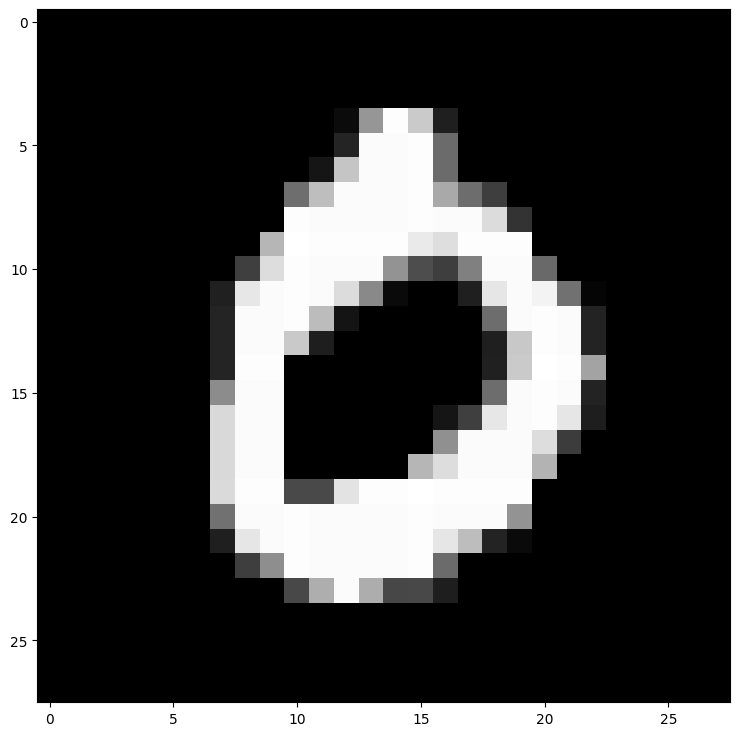

In [ ]:
plt.figure()
plt.imshow(X_test[3].reshape(28,28), cmap='gray', interpolation='none')

In [55]:
!pip install visualkeras

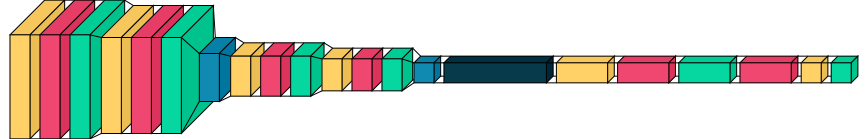

In [ ]:
import visualkeras
visualkeras.layered_view(model)

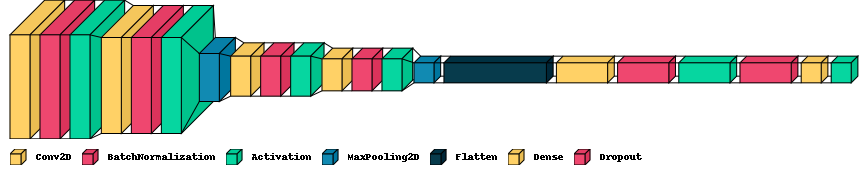

In [ ]:
visualkeras.layered_view(model, legend=True) # without custom font

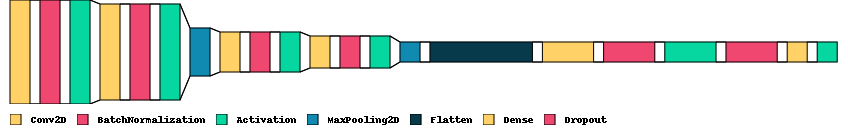

In [ ]:
visualkeras.layered_view(model, legend=True, draw_volume=False)

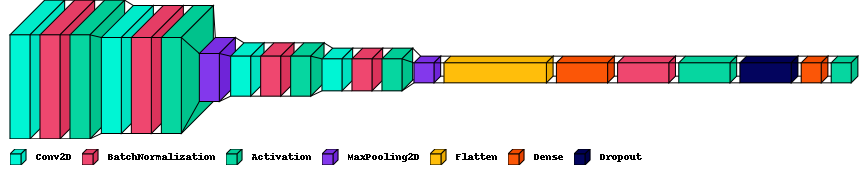

In [ ]:
from keras import layers
from collections import defaultdict
color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
visualkeras.layered_view(model, legend=True, color_map=color_map)